<a href="https://colab.research.google.com/github/lalitpandey02/EDA-on-bestselling-books/blob/main/Best_Booksellers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Categorical Feature Analysis**
- Univariate analysis - Line Chart, Bar Plot and Histogram
- Bivariate Analysis - Scatter Plot, Regression Plot, Stacked Bar, Bivariate line chart
- Multivariate Analysis - Scatter Plot, Regression Plot, Stacked Bar, Bivariate line chart, Heat Map

### **Numerical Feature Analysis**
- Correlation - Scatter Plot and Regression Plot
- Trend - Line Chart , Bar plot
- Distribution - Bar Plot and Pie Charts

## **EDA of Best Book Sellers  Dataset**

---------Questions--------------
1. Authors with highest user rating
2. Book name with highest and lowest number of reviews
3. Book with highest and lowest price
4. Year with highest and lowest number of sales
5. count of fiction and non-fiction books
6. Categorize User Rating
7. Price comparision between Non-Fiction and Fiction
8. Book Prices with lowest and highest sales

## **Study the dataset** 

In [189]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline 

In [190]:
url = "https://raw.githubusercontent.com/lalitpandey02/EDA-on-bestselling-books/main/bestsellers%20with%20categories.csv"
df = pd.read_csv(url)

In [191]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [192]:
print(df.shape)
df.info()

(550, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [193]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [194]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Observations:
- There are no missing records
- Contains books from the year 2009 to 2019
- Some books have a price of 0 so those could be complementary or free books available for all
- Mean price, and Q1 , Q2 , Q3 Quartiles are in the range of 11 to 16 but the Max price is 105. So there seems to be some outliers 

#### **Variable types in the dataset**

In [195]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

- Categorical Variables : Genre , Year
- Numerical Variables : User Rating, Reviews, Price

#### **Checking Outliers**

Price is the primary column which seems to be containing outliers

Distribution of Price

In [196]:
px.histogram(x = df.Price )

In [197]:
px.scatter(data_frame=df, y = "Price" , color = "Genre")

In [198]:
px.box(df, x = "Genre", y = "Price", color = "Genre")

As we see in the box plot and the scatter plot, the price of the books are 
 - Dense in region below 20.
 - Density decreases in the range of 20 to 40
 - It gets less dense in the range of 40 to 60
 - Above 60 it gets the least

Hence we can drop the records with price above 60

In [199]:
df[(df.Price > 60)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


<ipython-input-200-c9edc25ae697>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




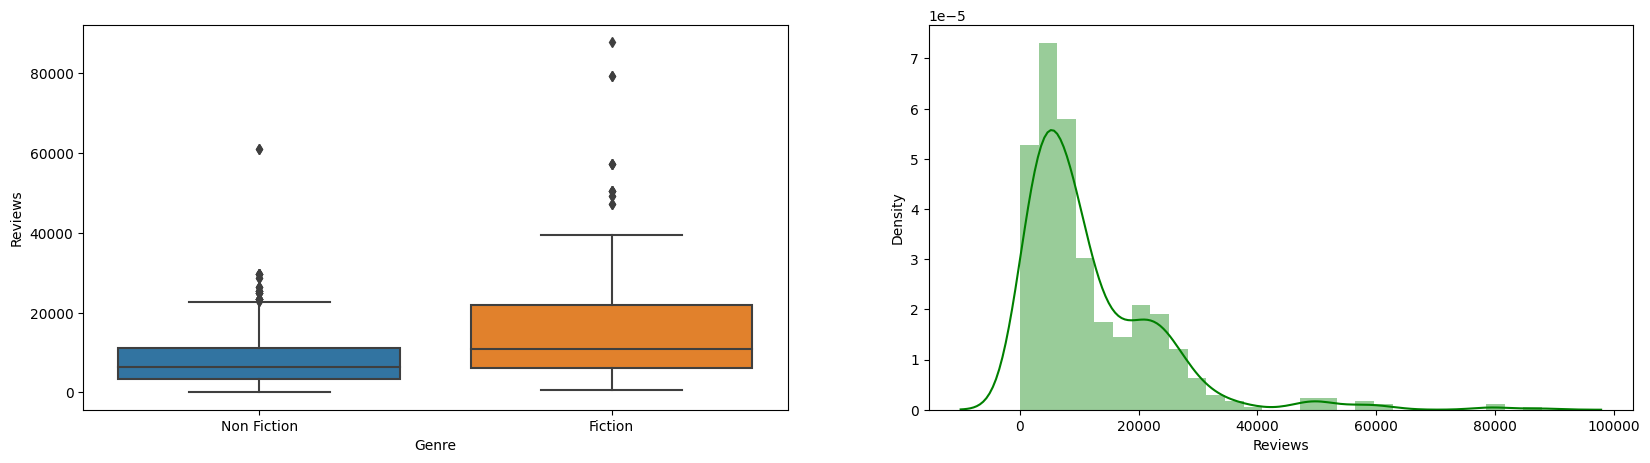

In [200]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.boxplot(data=df, x="Genre", y="Reviews")

plt.subplot(1,2,2)
sns.distplot(df["Reviews"], color="green" )

plt.show()

#### Checking unique values of each column

In [201]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [202]:
df["Genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [203]:
df.Price.value_counts().sort_index()

0      12
1       1
2       5
3       1
4      32
5      36
6      38
7      23
8      52
9      38
10     28
11     35
12     27
13     29
14     30
15     21
16     20
17     19
18     14
19      4
20     17
21      9
22      6
23      5
24      5
25      2
27      4
28      6
30      5
32      2
36      1
39      1
40      5
42      1
46     10
52      1
53      1
54      1
82      1
105     2
Name: Price, dtype: int64

In [204]:
df.Year.value_counts().sort_index()

2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: Year, dtype: int64

### Change Object datatypes to String

In [205]:
obj = list(df.select_dtypes(include="object"))
obj

['Name', 'Author', 'Genre']

In [206]:
df.loc[:,obj] = df.loc[:,obj].apply(lambda x: x.astype('str'))

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## Authors with highest user rating

In [208]:
df["User Rating"].max()

4.9

In [209]:
bestauthours = df[df["User Rating"] == df["User Rating"].max()]

In [210]:
bestauthours.Author.value_counts().index

Index(['Dr. Seuss', 'Eric Carle', 'Dav Pilkey', 'Sarah Young',
       'Emily Winfield Martin', 'J.K. Rowling', 'Bill Martin Jr.',
       'Sherri Duskey Rinker', 'Rush Limbaugh', 'Nathan W. Pyle',
       'Mark R. Levin', 'Chip Gaines', 'Patrick Thorpe', 'Pete Souza',
       'Alice Schertle', 'Jill Twiss', 'Brandon Stanton', 'J. K. Rowling',
       'Lin-Manuel Miranda', 'Jeff Kinney'],
      dtype='object')

In [211]:
bestauthours.Author.value_counts().values

array([8, 7, 7, 6, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [212]:
px.bar(x = bestauthours.Author.value_counts().index , y = bestauthours.Author.value_counts().values,
       title = "Authors with highest User Rating")

## Book name with highest and lowest number of reviews

In [213]:
df[df["Reviews"] == df["Reviews"].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [214]:
df[df["Reviews"] == df["Reviews"].min()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


## Book with highest and lowest price

In [229]:
df[df["Price"] == df["Price"].min()]['Name'].unique()

array(['Cabin Fever (Diary of a Wimpy Kid, Book 6)',
       'Diary of a Wimpy Kid: Hard Luck, Book 8',
       'Frozen (Little Golden Book)', 'JOURNEY TO THE ICE P',
       'Little Blue Truck', 'The Constitution of the United States',
       'The Getaway',
       'The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)',
       'To Kill a Mockingbird'], dtype=object)

In [230]:
df[df["Price"] == df["Price"].max()]['Name'].unique()

array(['Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5'],
      dtype=object)

## Year with highest and lowest number of sales